$$
\begin{split}
& \underline{\text{Summary : Single Real Root}} \\ \\
& \quad \Rightarrow \quad f(z) = 1 \pm |{\rho}|z^{-1} \\ \\
& \quad \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big| = \sqrt{({\pm})2|{\rho}|\Big[\cos(\omega) \space {\pm} \space \Gamma\Big]} \space \space, \quad |{\rho}| = \bigg(\Gamma + \sqrt{\Gamma^{2} - 1}\bigg)^{\operatorname{sgn\big(|{\rho}| - 1\big)}} \\ \\
&  \quad \Rightarrow \quad {\angle}f\big(e^{j\omega}\big) = \mp \tan^{-1}\begin{pmatrix}\frac{\sin(\omega)}{|{\rho}|^{-1} \space \pm \space \cos(\omega)}\end{pmatrix}
\\ \\ \\
\end{split}
$$

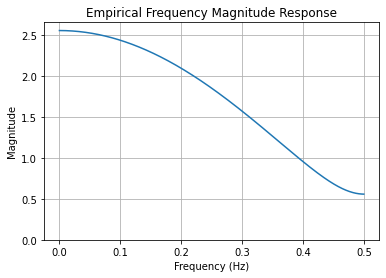

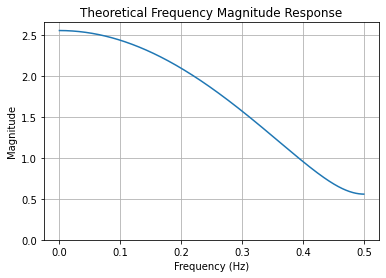

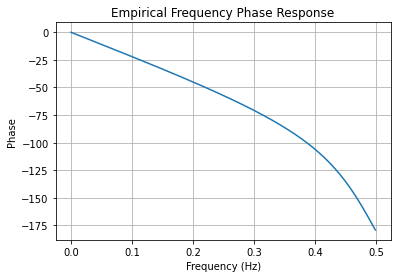

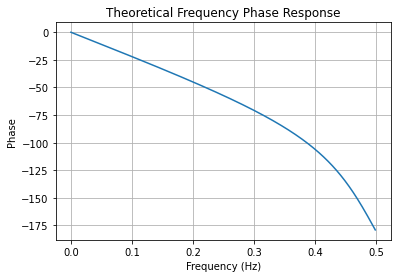

In [ ]:
import numpy as np
import scipy.signal as dsp
import matplotlib.pyplot as plt


def plotTheoAndEmp(freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg):

  plt.figure()
  plt.plot(freq, h_emp_abs)
  plt.ylim(bottom=0)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.title('Empirical Frequency Magnitude Response')

  plt.figure()
  plt.plot(freq, h_theo_mag)
  plt.ylim(bottom=0)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.title('Theoretical Frequency Magnitude Response')

  plt.figure()
  plt.plot(freq, h_emp_phase_deg)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Phase')
  plt.title('Empirical Frequency Phase Response')

  plt.figure()
  plt.plot(freq, h_theo_phase_deg)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Phase')
  plt.title('Theoretical Frequency Phase Response')


def calculateTheoAndEmp(Gamma, withinUnitCircle, coeff_sign):

  if(coeff_sign == 'Positive'):
    rho_sign = 1
  elif(coeff_sign == 'Negative'):
    rho_sign = -1
  else:
    raise ValueError('"coeff_sign" must either be "Positive" or "Negative"')
  
  if(withinUnitCircle):
    rho_abs_power = -1
  else:
    rho_abs_power = 1

  rho_abs = np.power(Gamma + np.sqrt(np.square(Gamma) - 1), rho_abs_power)
  rho = rho_sign*rho_abs

  [omega, h_emp] = dsp.freqz([1, rho])
  h_emp_abs = np.abs(h_emp)
  h_emp_phase_deg = np.rad2deg(np.angle(h_emp))

  h_theo_mag = np.sqrt(2*rho_abs*(Gamma + rho_sign*np.cos(omega)))
  h_theo_phase_deg = -1*rho_sign*np.rad2deg(np.arctan2(np.sin(omega), (1/rho_abs) + rho_sign*np.cos(omega)))

  freq = omega/(2*np.pi)

  return [freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg]


def main(Gamma, withinUnitCircle, coeff_sign):

  [freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg] = calculateTheoAndEmp(Gamma, withinUnitCircle, coeff_sign)
  plotTheoAndEmp(freq, h_emp_abs, h_theo_mag, h_emp_phase_deg, h_theo_phase_deg)


if(__name__=='__main__'):

  Gamma = 1.1
  withinUnitCircle = False
  coeff_sign = 'Positive'

  main(Gamma, withinUnitCircle, coeff_sign)
  


$$
\begin{split}
& \\ \\ \\ \\
& \underline{\text{Section A : DTFT with single complex root}} \\ \\
& \quad \quad \quad f(z) = 1 + \Big(|{\rho}|e^{{\pm}j{\angle}{\rho}}\Big)z^{-1} \space, \quad \big(\text{See} \space \underline{\bf\text{Single Complex Root}}\big) \\ \\
&  \quad \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big| = \sqrt{2|{\rho}|\Big[\Gamma + \cos\big(\omega \mp {\angle}{\rho}\big)\Big]} \space \space, \quad |{\rho}| = \bigg(\Gamma + \sqrt{\Gamma^{2} - 1}\bigg)^{\operatorname{sgn\big(|{\rho}| - 1\big)}} \\ \\
&  \quad \Rightarrow \quad {\angle}f\big(e^{j\omega}\big) = -\tan^{-1}\begin{pmatrix}\frac{\sin\big(\omega \mp {\angle}{\rho}\big)}{|{\rho}|^{-1} + \cos\big(\omega \mp {\angle}{\rho}\big)}\end{pmatrix} \\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Section B : Simplification of Z-transform}} \\ \\
& \quad \Rightarrow \quad f(z) = 1 + \Big(|{\rho}|e^{{\pm}j{\angle}{\rho}}\Big)z^{-1} \\ \\
& \quad \quad \quad \quad \quad \space = 1 + |{\rho}|e^{j{\angle}{\rho}}z^{-1} \\ \\
& \quad \Rightarrow \quad f(z) = 1 + |{\rho}|e^{j(0)}z^{-1} \space, \quad 1 + |{\rho}|e^{j{\pi}}z^{-1} \quad \quad \quad \quad \big(\text{See} \space \underline{\text{Appendix A}}\big) \\ \\
& \quad \quad \quad \quad \quad \space = 1 + |{\rho}|(1)z^{-1} \space, \quad 1 + |{\rho}|(-1)z^{-1} \\ \\
& \quad \quad \quad \quad \quad \space = 1 + |{\rho}|z^{-1} \space, \quad 1 - |{\rho}|z^{-1} \\ \\
& \quad \quad \quad \quad \quad \space = 1 \pm |{\rho}|z^{-1}
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Section C : Simplification of Magnitude and Phase}} \\ \\
& \quad \Rightarrow \quad \Big|f\big(e^{j\omega}\big)\Big| = \sqrt{2|{\rho}|\Big[\Gamma + \cos\big(\omega \mp {\angle}{\rho}\big)\Big]} \\ \\
& \quad \quad \quad \quad \quad \quad \space \space \space = \sqrt{2|{\rho}|\Big[\Gamma \pm \cos(\omega)\Big]} \quad \quad \quad \quad \space \space \big(\text{See} \space \underline{\text{Appendix B}}\big) \\ \\
& \quad \quad \quad \quad \quad \quad \space \space \space = \sqrt{({\pm})2|{\rho}|\Big[({\pm})\Gamma + \cos(\omega)\Big]} \\ \\
& \quad \quad \quad \quad \quad \quad \space \space \space = \sqrt{({\pm})2|{\rho}|\Big[\cos(\omega) \space {\pm} \space \Gamma\Big]} \\ \\
&  \quad \Rightarrow \quad {\angle}f\big(e^{j\omega}\big) = -\tan^{-1}\begin{pmatrix}\frac{\sin(\omega \mp {\angle}{\rho})}{|{\rho}|^{-1} + \cos(\omega \mp {\angle}{\rho})}\end{pmatrix} \\ \\
& \quad \quad \quad \quad \quad \quad \space \space \space = -\tan^{-1}\begin{pmatrix}\frac{{\pm}\sin(\omega)}{|{\rho}|^{-1} \space \pm \space \cos(\omega)}\end{pmatrix} \quad \quad \quad \big(\text{See} \space \underline{\text{Appendix B}}\big) \\ \\
& \quad \quad \quad \quad \quad \quad \space \space \space = \mp \tan^{-1}\begin{pmatrix}\frac{\sin(\omega)}{|{\rho}|^{-1} \space \pm \space \cos(\omega)}\end{pmatrix}
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix A : Restriction of angles}} \\ \\
& \quad \quad {\angle}{\rho}^{\circ} = \begin{cases} \quad \space 0^{\circ} \space, \space \space \rho \gt 0 \\ \space 180^{\circ} \space, \space \space \rho \lt 0 \end{cases} \\ \\
& \Rightarrow \quad {\angle}{\rho}^{\circ} = \begin{cases} \space   0 \space, \space \space \rho \gt 0 \\ \space \pi \space, \space \space \rho \lt 0 \end{cases} \\ \\
& \Rightarrow \quad \cos\big({\angle}{\rho}\big) = \begin{cases} \space \cos(0) \space, \space \space \rho \gt 0 \\ \space \cos(\pi) \space, \space \space \rho \lt 0 \end{cases} \\ \\
& \quad \quad \quad \quad \quad \quad = \begin{cases} \space \space \space 1 \space, \space \space \rho \gt 0 \\  -1 \space, \space \space \rho \lt 0 \end{cases} \\ \\
& \quad \quad \quad \quad \quad \quad = \operatorname{sgn}(\rho) \\ \\
& \quad \quad \quad \quad \quad \quad = \pm \\ \\
& \Rightarrow \quad \sin\big({\angle}{\rho}\big) = \begin{cases} \space \sin(0) \space, \space \space \rho \gt 0 \\ \space \sin(\pi) \space, \space \space \rho \lt 0 \end{cases} \\ \\
& \quad \quad \quad \quad \quad \quad = \begin{cases} \space 0 \space, \space \space \rho \gt 0 \\ \space 0 \space, \space \space \rho \lt 0 \end{cases} \\ \\
& \quad \quad \quad \quad \quad \quad = 0
\\ \\ \\
\end{split}
$$

$$
\begin{split}
& \underline{\text{Appendix B : Simplification of Trigonometric Terms}} \\ \\
& \Rightarrow \quad \cos\big(\omega \mp {\angle}{\rho}\big) = \cos\big(\omega\big)\cos\big({\angle}{\rho}\big) \pm \sin\big(\omega\big)\sin\big({\angle}{\rho}\big) \\ \\
& \quad \quad \quad \quad \quad \quad \quad \space \space \space = \cos\big({\angle}{\rho}\big)\cos\big(\omega\big) \pm \sin\big({\angle}{\rho}\big)\sin\big(\omega\big) \\ \\
& \quad \quad \quad \quad \quad \quad \quad \space \space \space = (\pm)\cos\big(\omega\big) \pm (0)\sin\big(\omega\big)  \quad \quad \quad \quad \quad \quad \big(\text{See} \space \underline{\text{Appendix A}}\big) \\ \\
& \quad \quad \quad \quad \quad \quad \quad \space \space \space = {\pm}\cos\big(\omega\big) \\ \\
& \Rightarrow \quad \sin\big(\omega \mp {\angle}{\rho}\big) = \sin\big(\omega\big)\cos\big({\angle}{\rho}\big) \mp \cos\big(\omega\big)\sin\big({\angle}{\rho}\big) \\ \\
& \quad \quad \quad \quad \quad \quad \quad \space \space \space = \cos\big({\angle}{\rho}\big)\sin\big(\omega\big) \mp \sin\big({\angle}{\rho}\big)\cos\big(\omega\big) \\ \\
& \quad \quad \quad \quad \quad \quad \quad \space \space \space = (\pm)\sin\big(\omega\big) \mp (0)\cos\big(\omega\big) \\ \\
& \quad \quad \quad \quad \quad \quad \quad \space \space \space = {\pm}\sin\big(\omega\big)
\end{split}
$$